# Part A: Model Code (60 pts)




In [1]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt

1. Write a function to calculate and return the Minkowski distance with optional argument p. defaulting to ‘p=2’ (Euclidean) of two vectors where a vector represents a data point.[6 pts]

In [2]:
import numpy as np

def Distance(v1, v2, p=2):
    v1 = np.array(v1)
    v2 = np.array(v2)

    # Calculate the absolute differences raised to the power of p
    absolute_diff = np.abs(v1 - v2) ** p

    # Sum the absolute differences raised to the power of p, then take the p-th root
    distance = np.sum(absolute_diff) ** (1/p)

    return distance

# Example usage:
v1_ex = [1, 2, 3]
v2_ex = [4, 5, 6]
euclidean_distance = Distance(v1_ex, v2_ex)   # Default p=2 for Euclidean distance
print("Euclidean Distance:", euclidean_distance)

manhattan_distance = Distance(v1_ex, v2_ex, p=1)  # Setting p=1 for Manhattan distance
print("Manhattan Distance:", manhattan_distance)

chebyshev_distance = Distance(v1_ex, v2_ex, p=np.inf)  # Setting p=inf for Chebyshev distance
print("Chebyshev distance:", chebyshev_distance)


Euclidean Distance: 5.196152422706632
Manhattan Distance: 9.0
Chebyshev distance: 1.0


2. Write a function to calculate and return the accuracy of two vectors. [4 pts]

In [3]:
def accuracy(y_true, y_pred): #y_true: The true labels/ y_pred: The predicted labels.

    # Ensure the lengths of the vectors are the same
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of the input vectors do not match.")

     # Calculate the accuracy
    acc = sum(true == pred for true, pred in zip(y_true, y_pred)) / len(y_true)
    return acc

# Example usage of the accuracy function
y_true_example = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
y_pred_example = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]

# Calculate accuracy
accuracy_score = accuracy(y_true_example, y_pred_example)
print("Accuracy:", accuracy_score)
print(f"Accuracy: {accuracy_score * 100:.2f}%")

Accuracy: 0.7
Accuracy: 70.00%


3. Write three functions to compute: precision, recall and F1 score. [6 pts]

Formula's for precision is the ratio of TP/(TP+FP),

Recall is the ration of TP/(TP+FN),

f1-score is the harmonic mrean of precision and recall and its value is calculate by

f1-score = 2*((precision * recall)/(precision + recall)), where

TP= True Positive

FP= False Positive

FN = False Negative

In [4]:
def precision(true_pos, false_pos):
    return true_pos / (true_pos + false_pos)

def recall(true_pos, false_neg):
    return true_pos / (true_pos + false_neg)

def f1_score(true_pos, false_pos, false_neg):
    precision_value = precision(true_pos, false_pos)
    recall_value = recall(true_pos, false_neg)
    return 2 * (precision_value * recall_value) / (precision_value + recall_value)

#Example usage:
predicted_labels = [1, 1, 1, 1, 1, 1, 0, 1, 1]
actual_labels = [0, 1, 0, 0, 1,0, 1, 0, 1, 0, 1, 0]

# Calculate True Positives, False Positives, and False Negatives
true_pos = sum(1 for p, a in zip(predicted_labels, actual_labels) if p == 1 and a == 1)
false_pos = sum(1 for p, a in zip(predicted_labels, actual_labels) if p == 1 and a == 0)
false_neg = sum(1 for p, a in zip(predicted_labels, actual_labels) if p == 0 and a == 1)

# Calculate precision, recall, and F1 score
precision_score = precision(true_pos, false_pos)
recall_score = recall(true_pos, false_neg)
f1_score_value = f1_score(true_pos, false_pos, false_neg)

# Print the results
print(f"Precision: {precision_score:.2f}")
print(f"Recall: {recall_score:.2f}")
print(f"F1 Score: {f1_score_value:.2f}")


Precision: 0.38
Recall: 0.75
F1 Score: 0.50


4. Write a function to compute the confusion matrix of two vectors. [4 pts]

In [5]:
#import the required library
import numpy as np
#define a function for confusion matrix with three parameters
def confusion_matrix(y_true, y_pred,pos_label):

    #create a 2x2 matrix for confusion matrix output
    matrix= np.zeros((2,2),  dtype=int)

    #Use for loop to iterate over both the actual and predicted values respectively
    for (a, p) in zip(y_true, y_pred):

        # Use if else condition to check the TP,FP,FN,TN one by one where
        if a == pos_label and p ==pos_label: ## TP
            matrix[0,0] += 1
        elif a != pos_label and p == pos_label:## FP
            matrix[0,1] += 1
        elif a == pos_label and p != pos_label: ## FN
            matrix[1,0] += 1
        else:
            matrix[1,1]+= 1 ## TN
    return matrix

#example usage
y_true =  [1, -1, 1, -1, 1, 1, 1 ,1]
y_pred =[1, -1,-1, -1, 1,-1,-1, 1]
pos_label= 1
conf_mat = confusion_matrix(y_true, y_pred,pos_label)
print(conf_mat )


[[3 0]
 [3 2]]


5. Write a function to generate the Receiver Operating Characteristic (ROC) curve.

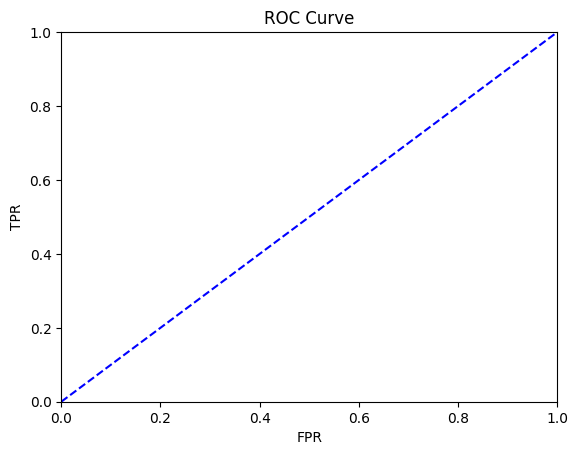

<function __main__.roc_curve(y_true, y_prob, n_thresholds=100)>

In [6]:
#import libraries to plot the curve or graph.
import matplotlib.pyplot as plt

# define a function roc_curve with three parameters which are true labels,
def roc_curve(y_true, y_prob, n_thresholds=100): #predicted probability for positive class and thresholds set to default=100.
    #Initializing TPR and FPR
    tpr=[]
    fpr=[]
    #define thresholds where 0 is starting and 1 is ending
    thresholds = np.linspace(0,1, n_thresholds)

    #Using for loop to calculate TP,FP,FN,Tn, tpr and fpr
    for t in thresholds:
        # compare the elements between predicted and the threshold
        y_pred= (y_prob >= t).astype(int)
        tp = np.sum((y_pred== 1) & (y_true==1))
        fp = np.sum((y_pred== 1) & (y_true==0))
        tn = np.sum((y_pred== 0) & (y_true==0))
        fn = np.sum((y_pred== 0) & (y_true==1))
      #calculate the value for tpr value and fpr value
        if tp + fn == 0:
            tprv = 0.0  # Avoid division by zero
        else:
            tprv = tp / (tp + fn)

        if fp + tn == 0:
            fprv = 0.0  # Avoid division by zero
        else:
            fprv = fp / (fp + tn)

        #populate the values to empty list created above
        tpr.append(tprv)
        fpr.append(fprv)

    #Applying tpraz for area under the curve
    roc_auc = round(np.trapz(tpr, fpr), 2)

    #Plotting the graph
    plt.plot([0, 1], [0, 1], color="blue", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title('ROC Curve')
    plt.show()

    return roc_curve


##example values
y_true=[1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
y_prob = [1,1, 1, 1, 1, 0, 1, 0, 1, 1]
curve_plot=roc_curve(y_true,y_prob)
curve_plot


6. Write a function to compute area under curve (AUC) for the ROC curve. [5 pts]

In [7]:
def auc_roc(fpr, tpr): # Compute the Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve.
    # Ensure fpr and tpr are numpy arrays
    fpr = np.array(fpr)
    tpr = np.array(tpr)

    # Compute the area under the ROC curve using the trapezoidal rule
    auc_value = np.trapz(tpr, fpr)

    return auc_value

# Example usage of auc_roc function
fpr_example = np.array([0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]) # fpr (array-like): False Positive Rates.
tpr_example = np.array([0, 0.2, 0.4, 0.6, 0.8, 0.9, 1]) # tpr (array-like): True Positive Rates.

auc = auc_roc(fpr_example, tpr_example)
print("Area under the ROC curve (AUC):", auc)


Area under the ROC curve (AUC): 0.575


7. Write a function to generate the precision-recall curve. [5 pts]            
X: Recall   = TP/TP+FN                                                         
Y: Precision= TP/TP+FP      .                                                 
The x-axis represents Recall, and the y-axis represents Precision. The area under the curve (AUC-PR) is calculated below these axes.                                                  

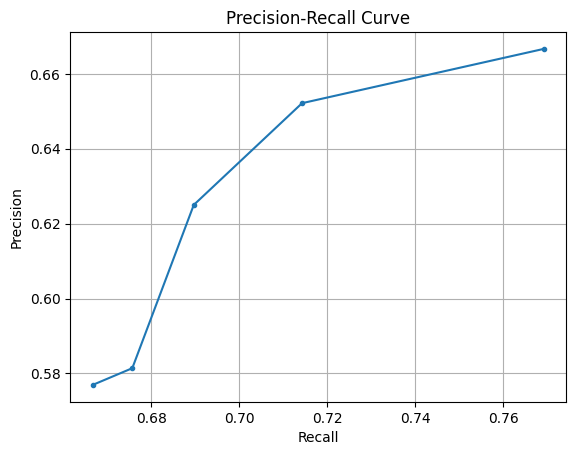

In [8]:
# Define the function for precision
def prec(TP, FP, FN):
    if TP < 0 or FP < 0 or FN < 0:
        raise ValueError("Input values TP, FP, FN : non-negative")
    precision = TP / (TP + FP)
    return precision

# Define the function for recall
def rec(TP, FP, FN):
    if TP < 0 or FP < 0 or FN < 0:
        raise ValueError("Input values TP, FP, FN:non-negative")
    recall = TP / (TP + FN)
    return recall

# Define a function to generate the precision-recall curve
def precision_recall_c(TP_values, FP_values, FN_values):
    # Calculate precision and recall for each set of values using a list comprehension
    precisions = [prec(TP, FP, FN) for TP, FP, FN in zip(TP_values, FP_values, FN_values)]
    recalls = [rec(TP, FP, FN) for TP, FP, FN in zip(TP_values, FP_values, FN_values)]

    # Plot the precision-recall curve
    plt.plot(recalls, precisions, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

#Example usage:
TP_values = [10, 15, 20, 25, 30]
FP_values = [5, 8, 12, 18, 22]
FN_values = [3, 6, 9, 12, 15]

# Generate the precision-recall curve for the new sample data
precision_recall_c(TP_values, FP_values, FN_values)


8. Implement a KNN_Classifier model class. It should have the following three methods.[20 pts]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Caculate Minkowski distance between two vectors with default p=2
class KNN_classifier: # KNN Classifier class
  def __init__(self, n_neighbors=5, weights='uniform', p=2): #method 1 _init_ # Initialize KNN classifier with specified parameters
    self.n_neighbors = n_neighbors
    self.weights = weights
    self.p = p

  def fit(self, X_train, y_train): # Fit the KNN classifier to the training data
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_predict, threshold=0.5):  #method  # Predict the class labels for the input data
    y_prob = self.predict_proba(X_predict)
    n = y_prob.shape[0]
    y_pred = np.zeros((n,1))
    for idx in range(n):
      if y_prob[idx] > threshold:
        y_pred[idx] = 1
      else:
        y_pred[idx] = 0
    return y_pred

  def predict_proba(self, X_predict): #method # Predict class probabilities for the input data
    n = self.X_train.shape[0]
    m = self.X_train.shape[1]
    z = X_predict.shape[0]
    y_prob = np.zeros((z,1))
    for i in range(z):
      distances = []
      for j in range(n):  # Calculate Minkowski distance between input data point and training data points
        distances.append(Distance(self.X_train[j], X_predict[i].T))

      distancesSorted = np.argsort(distances)
      topK = [self.y_train[idx].item() for idx in distancesSorted[:self.n_neighbors]]
      if self.weights == "uniform":
        topKDict = Counter(topK)
        y_prob[i] = topKDict[1]/self.n_neighbors
      elif self.weights == "idw":
        inverseDistances = [(1+1e-5)/(distances[idx]+1e-5) for idx in distancesSorted[:self.n_neighbors]]
        idSum = sum(inverseDistances)
        inverseDistanceWeights = [id/idSum for id in inverseDistances]
        for idx, x in enumerate(topK):
          if x == 1:
            y_prob[i] += inverseDistanceWeights[idx]

    return y_prob

  def get_params(self):        #method  # Get parameters of the KNN classifier
    return {"n_neighbors":self.n_neighbors,
            "weights":self.weights,
            "p":self.p}

  def set_params(self, **params): #method  # Set parameters of the KNN classifier
    validParams = self.get_params()
    validParams.update(params)

    self.n_neighbors = validParams['n_neighbors']
    self.weights = validParams['weights']
    self.p = validParams['p']
    return self


9. Write a function named “partition” to split your data into training and test sets. The function should take 4 arguments: [ 5 pts]

In [10]:
# Function to split data into training and test sets
import numpy as np

def partition(featureM, targetVec, t, shuffle=True): #featureM: Input features matrix. targetVec: Target labels vector t: Ratio of the dataset to include in the test set.
    if shuffle == True: #shuffle: Whether to shuffle the data before splitting. Default is True.
        np.random.seed(42)
        shuffledIndices = np.random.permutation(len(featureM))
        testSize = int(len(featureM) * t)
        testIndices = shuffledIndices[:testSize]
        trainIndices = shuffledIndices[testSize:]
        return featureM[trainIndices, :], featureM[testIndices,:], targetVec[trainIndices], targetVec[testIndices]


#Part B: Data Processing, Feature Selection, and Initial Estimation (40 pts)

10. Read in the winequality-white.csv file as a Pandas data frame.

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import pandas as pd
# Read the CSV file with the correct delimiter
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ ML/winequality-white.csv", delimiter=';')
df.shape

(4898, 12)

11. The target will be the “quality” column which represents the rating of wine and ranges from 3 to 8.
You will need to convert it into a two-category variable consisting of “good” (quality> 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine). [2 pts]


In [13]:
# Define a function to map the quality values to binary labels
def map_quality(quality):
    if quality > 5:
        return 1  # "good" quality wine
    else:
        return 0  # "bad" quality wine

# Apply the mapping function to create the target vector
df['quality'] = df['quality'].apply(map_quality)

df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


12. Provide a table with univariate statistics of your data (mean, standard deviation, and quartiles, min, max, missing count, number of unique values). [4 pts]

In [14]:
# Calculate the number of unique values for each column
unique_vals = [len(df[col].unique()) for col in list(df)]

In [15]:
# Calculate univariate statistics
stats = df.describe(include='all').transpose()

# Calculate missing count and number of unique values
missing_count = df.isnull().sum()
unique_values = df.nunique()

# Add missing count and number of unique values to the statistics DataFrame
stats['Missing Count'] = missing_count
stats['Unique Values'] = unique_values

# Rename the columns for clarity
stats = stats.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Standard Deviation',
    'min': 'Min',
    '25%': '25th Percentile (Q1)',
    '50%': 'Median (Q2)',
    '75%': '75th Percentile (Q3)',
    'max': 'Max'
})

# Display the univariate statistics table
print(stats.round(3))

                       Count     Mean  Standard Deviation    Min  \
fixed acidity         4898.0    6.855               0.844  3.800   
volatile acidity      4898.0    0.278               0.101  0.080   
citric acid           4898.0    0.334               0.121  0.000   
residual sugar        4898.0    6.391               5.072  0.600   
chlorides             4898.0    0.046               0.022  0.009   
free sulfur dioxide   4898.0   35.308              17.007  2.000   
total sulfur dioxide  4898.0  138.361              42.498  9.000   
density               4898.0    0.994               0.003  0.987   
pH                    4898.0    3.188               0.151  2.720   
sulphates             4898.0    0.490               0.114  0.220   
alcohol               4898.0   10.514               1.231  8.000   
quality               4898.0    0.665               0.472  0.000   

                      25th Percentile (Q1)  Median (Q2)  75th Percentile (Q3)  \
fixed acidity                     

13. Generate pair plots using the seaborn package to help identify redundant features. For any redundant features(?), report, drop, and explain your logic (w/ markdown). [4 pts]


In [16]:
import seaborn as sns
sns.pairplot(df, hue = 'quality') # I want to compare all files with quality
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [39]:
#correlation
correlation_matrix = df.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.089749
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.225440
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.000700
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.092756
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183939
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.001278
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.170924
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.268696
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.083687
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.051858


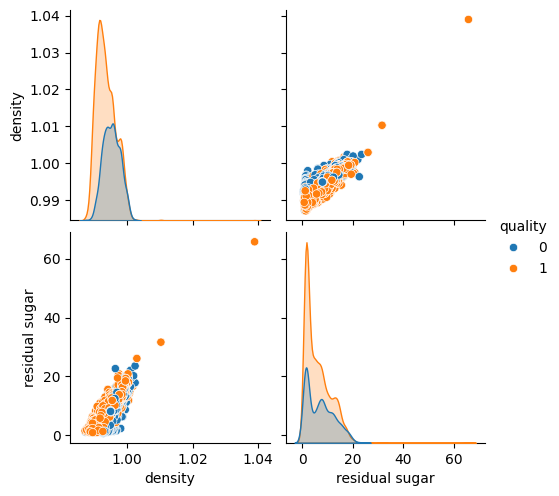

In [41]:
sns.pairplot(df[['density', 'residual sugar', 'quality']], hue = 'quality') #positive correlation
plt.show()

Check if correlation is high
if correlation > 0.8: Drop density feature

In [40]:
# List of redundant feature columns to remove
columns_to_remove = ["density"]
df_final = df.drop(columns=columns_to_remove)
df_final

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8,1


14. Use your “partition” function to split the data into 80% train and 20% test. [5 pts]

In [42]:
#Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score

In [43]:
# Split the data into 80% train and 20% test
X = df_final.drop(['quality'], axis=1)  # Features
y = df_final['quality']  # Target variable

# Use train_test_split to perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


15. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and using Euclidean distance. [15 pts]



*   a. Use accuracy and F1 score to compare your predictions to the expected labels.
*   b. Now standardize each feature of your training set (subtract mean and divide by standard deviation) and apply trained standardization to the test set. Use the mean and standard deviation values for each feature in the training set to scale the test data (you can use sklearn.preprocessing.StandardScaler)
*   c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1 score with the expected labels.
*   d. Compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assignment.
*   e. Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it. [5 pts]




In [44]:
#Import the required libraries
from sklearn.preprocessing import StandardScaler

In [45]:
# a. Train KNN_Classifier model and evaluate with accuracy and F1 score
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)

## Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Calculate F1 score on the test data
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7112244897959183
F1 Score: 0.7941818181818181


Since the accuracy and F1 score are both above 0.5, which is indicative of strong performance, we may conclude that the model is doing well.

In [46]:
#b. Standardization:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

# Use same scaler to transform test data
X_test_scaled = scaler.transform(X_test)

# Confirm scaling worked
print("X_train scaled mean:", X_train_scaled.mean(axis=0))
print("X_train scaled std:", X_train_scaled.std(axis=0))

print("X_test scaled mean:", X_test_scaled.mean(axis=0))
print("X_test scaled std:", X_test_scaled.std(axis=0))

X_train scaled mean: [ 2.56615102e-16 -5.36806151e-16 -3.30063241e-16  7.34481388e-17
 -3.22809104e-16 -9.88376189e-17  6.98210703e-17  1.73555232e-15
 -2.00395539e-16  5.48594123e-17]
X_train scaled std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X_test scaled mean: [-0.06071995 -0.05394598  0.06096112 -0.05766376  0.00878483  0.06399892
  0.04271784 -0.03416091  0.00292092  0.02209133]
X_test scaled std: [0.99500237 0.95834374 1.05033072 0.93147114 1.01163287 1.09400759
 1.04956803 1.02658436 1.02348292 1.01101279]


In [47]:
# c. Re-initialize KNN classifier
# Train model on scaled data
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
print("Accuracy (scaled):", accuracy_score(y_test, y_pred_scaled))
print("F1 score (scaled):", f1_score(y_test, y_pred_scaled))

Accuracy (scaled): 0.7622448979591837
F1 score (scaled): 0.8267657992565056


d. The performance metrics (accuracy and F1 score) showed significant improvement when using standardized data compared to unscaled data. Accuracy increased from 0.71 to 0.76, and the F1 score increased from 0.79 to 0.83. Based on these results, it's advisable to use standardized data for the remainder of the assignment since it leads to better performance.

In [48]:
#e.Perform a similar test for inverse distance weighting in the KNN_Classifier model
#determine whether or not to use it.
# Inverse distance weights
def inverse_distance_weights(distance):
    return 1 / distance

# Pass our custom function as weights
knn = KNeighborsClassifier(weights=inverse_distance_weights)

# Fit the model to the scaled training data
knn.fit(X_train_scaled, y_train)
# Make predictions on the scaled test data
y_pred_inv = knn.predict(X_test_scaled)

# Calculate and print the accuracy
print("Inverse distance accuracy:", accuracy_score(y_test, y_pred_inv))

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred_inv)
print("Inverse distance F1 score:", f1)

Inverse distance accuracy: 0.826530612244898
Inverse distance F1 score: 0.8725637181409295


<ipython-input-48-c35f39ddb25a>:5: RuntimeWarning: divide by zero encountered in divide
  return 1 / distance


The F1 Score obtained with inverse distance weighting (IDW) in the KNN Classifier model is 0.87, and the accuracy is 0.83. Based on these results, it appears that using IDW improves both F1 score and accuracy compared to the model without IDW. Therefore, it is advisable to use IDW for this classification task.







16. Repeat #15 a-d, but using a logistic regression with ‘elasticnet’ or ‘l2’ penalty (feel free to
use sklearn.linear_model.LogisticRegression) [10 pts]

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
# Logisitic regression with L2 regularization
LogicR = LogisticRegression(penalty='l2', C=0.1,max_iter=1000 )
# Fit the model to the data
LogicR.fit(X_train, y_train)

y_pred_l2 = LogicR.predict(X_test)
#Calculate and print the  accuracy and F1 score
print("L2 Accuracy:", accuracy_score(y_test, y_pred_l2))
print("L2 F1 score:", f1_score(y_test, y_pred_l2))


L2 Accuracy: 0.7173469387755103
L2 F1 score: 0.8017179670722977


In [51]:
 #Standardize training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use same scaler to transform test data
X_test_scaled = scaler.transform(X_test)

# Confirm scaling worked
print("X_train scaled mean:", X_train_scaled.mean(axis=0))
print("X_train scaled std:", X_train_scaled.std(axis=0))

print("X_test scaled mean:", X_test_scaled.mean(axis=0))
print("X_test scaled std:", X_test_scaled.std(axis=0))

X_train scaled mean: [ 2.56615102e-16 -5.36806151e-16 -3.30063241e-16  7.34481388e-17
 -3.22809104e-16 -9.88376189e-17  6.98210703e-17  1.73555232e-15
 -2.00395539e-16  5.48594123e-17]
X_train scaled std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X_test scaled mean: [-0.06071995 -0.05394598  0.06096112 -0.05766376  0.00878483  0.06399892
  0.04271784 -0.03416091  0.00292092  0.02209133]
X_test scaled std: [0.99500237 0.95834374 1.05033072 0.93147114 1.01163287 1.09400759
 1.04956803 1.02658436 1.02348292 1.01101279]


On the standardized data, rerun the logistic regression with L2 regularization model to determine the accuracy and F1 score using the predicted labels.

In [52]:
# Train model on scaled data
LogicR.fit(X_train_scaled, y_train)
y_pred_scaled = LogicR.predict(X_test_scaled)
print("Accuracy(scaled):", accuracy_score(y_test, y_pred_scaled))
print("F1 score(scaled):", f1_score(y_test, y_pred_scaled))

Accuracy(scaled): 0.7418367346938776
F1 score(scaled): 0.8199288256227757


# Part C: Model Evaluation and Results Summary (100 pts)

17) Evaluation of an estimator performance via cross-validation: Implement the S-fold cross validation function. [15 pts]


a. sFold(folds, data, labels, model, model_args, error_fuction)
*   i. folds is an integer number of folds.
*   ii. data is a numpy array with rows representing data samples and columns
representing features.
*   iii. labels is a numpy array with labels corresponding to each row of training_features.
*   iv. model is an object with the fit and predict methods.
*   v. model args is a dictionary of arguments to pass to the classification algorithm. If you are unfamiliar, look up using the ** operator to unpack dictionaries as arguments
*   vi. error_function :Returns error value between predicted and true labels. For example, mean squared error (mse) function could be used as error_function.



In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.model_selection import KFold

In [54]:
# define a function
def sFold(folds, data, labels, model, model_args, error_function):
    ## implement Ffold
    ks = KFold(n_splits=folds)
    ##create empty lists for the final outputs
    expected_labels = []
    predicted_labels = []
    #Track error across folds
    errors = []
    ## Using for loop to go over all the folds
    for train_index, test_index in ks.split(data):
        # Split data into train and test sets
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        ## Create and fit the model
        clf = model(**model_args)
        clf.fit(X_train, y_train)

        ## Make predictions on the test set
        y_pred = clf.predict(X_test)

        ## Calculate the error using the error function
        error = error_function(y_test, y_pred)

        expected_labels.extend(y_test)
        predicted_labels.extend(y_pred)
        errors.append(error)

    ## Calculate the average error
    average_error = np.mean(errors)

    return expected_labels, predicted_labels, average_error
if __name__ == "__main__":
    ## extract data and labels from the DataFrame
    data = df.drop(columns=["quality"]).to_numpy()
    labels = df["quality"].to_numpy()

    ## model arguments
    model_args = {'solver': 'lbfgs', 'max_iter': 1000}

    ## Applying s fold cross validation here e are doing s=4
    expected_labels, predicted_labels, average_error = sFold(5, data, labels, LogisticRegression, model_args, mean_squared_error)

    ## printing top 10 result
    print("The expected labels are:", expected_labels[:10])

    print("\nThe predicted labels are:", predicted_labels[:10])

    print("\nThe average error is:", round((average_error),2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

The expected labels are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

The predicted labels are: [1, 0, 1, 1, 1, 1, 0, 1, 0, 1]

The average error is: 0.26


18) Only using the training portion of your data, use your sfold function to evaluate the
performance of your model over each combination of k and distance metrics from the following
sets: [10 pts]
*   i. k=[1,5,9,11]
       b. distance = [Euclidean, Manhattan]
*   ii. weights = [uniform, distance]
*   iii. From the returned tuple store as a row in a pandas DataFrame with headers: Experiment name, k, distance, weights, Average F1
*   iv. Determine the best model based on the overall performance. For the error_function of the S-fold function argument use the F1 score function from Part A.

In [55]:
#values of for parameters of Knn model  is already given in the question, which are as follows
k_values = [1, 5, 9, 11]
distances = ["euclidean", "manhattan"]
weights = ["uniform", "distance"]
#creating an empty dataframe to populate the resultant values after the model performance
perf = pd.DataFrame(columns=['Experiment name', 'n_neighbors', 'distance', 'weights', 'Average F1'])
# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
#using for loop to go over all three parameters given in the questions
# for using sfold function defined in previous question
index_counter = 0
for k in k_values:
    for distance in distances:
        for weight in weights:
            # define the model with its parameters
              model_args = {'n_neighbors': k, 'weights': weight, 'metric': distance}

               # apply sfold cross validation here e are doing s=4, the same function used in last question
              expected_labels5, predicted_labels5, avg_error = sFold(5, train_data, train_labels, KNeighborsClassifier, model_args, f1_score)

              #calculate the average f1-score
              average_f1= f1_score(expected_labels5, predicted_labels5, average="weighted")

              performance_df_values = pd.DataFrame({'Experiment name': f'k={k}, distance={distance}, weights={weight}',
                                                  'n_neighbors': k,
                                                  'distance': distance,
                                                  'weights': weight,
                                                  'Average F1': average_f1},
                                                 index=[index_counter])


              perf = pd.concat([perf, performance_df_values])


df_sorted = perf.sort_values(by='Average F1', ascending=False)
df_sorted.reset_index(drop =True, inplace=True)
df_sorted

,Experiment name,n_neighbors,distance,weights,Average F1
0,"k=11, distance=manhattan, weights=distance",11,manhattan,distance,0.762225
1,"k=9, distance=manhattan, weights=distance",9,manhattan,distance,0.756261
2,"k=9, distance=euclidean, weights=distance",9,euclidean,distance,0.750974
3,"k=5, distance=manhattan, weights=distance",5,manhattan,distance,0.750917
4,"k=11, distance=euclidean, weights=distance",11,euclidean,distance,0.749836
5,"k=5, distance=euclidean, weights=distance",5,euclidean,distance,0.740819
6,"k=1, distance=manhattan, weights=uniform",1,manhattan,uniform,0.732666
7,"k=1, distance=manhattan, weights=distance",1,manhattan,distance,0.732666
8,"k=1, distance=euclidean, weights=uniform",1,euclidean,uniform,0.729658
9,"k=1, distance=euclidean, weights=distance",1,euclidean,distance,0.729658


In [56]:
best_model = perf[perf['Average F1'] == perf['Average F1'].max()]

# Display the best model
print("Best Model:")
print(best_model)

Best Model:
                              Experiment name n_neighbors   distance  \
0  k=11, distance=manhattan, weights=distance          11  manhattan   

    weights  Average F1  
0  distance    0.762225  


19) Repeat #18 for at least 3 experiments for the regularized logistic regression from #16 and discuss why you optimized over your selected hyper-parameters [10 pts]

We are thinking about several hyperparameters that we will need for this experiment. Penalty values = ['l1', 'l2'] and C values = [0.1, 1, 10]

In [63]:
C_values = [ 0.1, 1.0, 10]
penalty_values = ['l1', 'l2']

## Creating an empty DataFrame for logistic regression performance
perform_df = pd.DataFrame(columns=['Experiment name', 'penalty', 'solver', 'C', 'Average F1'])

index_counter = 0

## Creating for loop to iterate over all the hyperparameters of logistic regression
for c in C_values:
    for p in penalty_values:
        # Define the model with its parameters
        solver = 'liblinear' if p == 'l1' else 'lbfgs'
        model_args = {'penalty': p, 'C': c, 'solver': solver, "max_iter":1000}

        ## Apply sFold cross-validation defined in question 17
        expected_labels4, predicted_labels4, avg_error = sFold(5, data, labels, LogisticRegression, model_args, f1_score)

        ## Calculate the average f1-score
        average_f1 = f1_score(expected_labels4, predicted_labels4, average="weighted")

        ## Populating the dataframe with values generated and the hyperparameters used
        perform_df_values = pd.DataFrame({'Experiment name': f'penalty={p}, solver={solver}, C={c}',
                                              'penalty': p,
                                              'solver': solver,
                                              'C': c,
                                              'Average F1': average_f1},
                                             index=[index_counter])

        ## Concatenating DataFrames
        perform_df = pd.concat([perform_df, perform_df_values])

## Display the resulting DataFrame
perform_df

# Sort the DataFrame by 'Average F1' in descending order
perform_df_sorted = perform_df.sort_values(by='Average F1', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
perform_df_sorted

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Experiment name,penalty,solver,C,Average F1
0,"penalty=l1, solver=liblinear, C=10",l1,liblinear,10.0,0.731975
1,"penalty=l1, solver=liblinear, C=1.0",l1,liblinear,1.0,0.731880
2,"penalty=l2, solver=lbfgs, C=10",l2,lbfgs,10.0,0.729727
3,"penalty=l2, solver=lbfgs, C=1.0",l2,lbfgs,1.0,0.727677
4,"penalty=l1, solver=liblinear, C=0.1",l1,liblinear,0.1,0.717590
5,"penalty=l2, solver=lbfgs, C=0.1",l2,lbfgs,0.1,0.705643


 Best Model: {'C': 10:, 'penalty': 'l1'}
Best CV Score:  0.731975

**Discussion: Explain why these hyperparameters were optimized and how they affect model performance.**


i) Penalty type (L1 vs. L2): The model's feature selection and sparsity are greatly influenced by the type of penalty. Because L1 and L2 penalties use distinct regularization techniques, they provide highly different models and performance results. While L2 penalty lowers all coefficients proportionately, lowering overall model complexity, L1 penalty tends to provide sparser solutions by reducing some coefficients to zero, simplifying the model.

ii) C value: The trade-off between underfitting and overfitting is managed by the C parameter. The dataset determines the ideal value of C, which is essential for avoiding arbitrary settings. Smaller values result in stronger regularization and vice versa. It establishes the strength of the regularization that is done.

iii) Additional hyperparameters (solvers, max_iter, etc.): These parameters alter the model's convergence, but the bias-variance tradeoff is directly impacted by the penalty type and C value.

Summary: Penalty and C are most critical for regularization and managing overfitting. Using grid search to find the optimal balance empirically through cross-validation is much more effective than manually guessing the values. This approach allows for systematically exploring a range of configurations and determining which combination yields the best performance on a given dataset.

**20) Based on the results above, use the full training portion (80%), to re-estimate your best (subjective) model. Discuss why you made your choice. [5 pts]**


In [81]:
C_values = [0.1, 1.0, 10.0]
penalty_values = ['l1', 'l2']

# Creating an empty DataFrame for logistic regression performance
perform_df = pd.DataFrame(columns=['Experiment name', 'penalty', 'solver', 'C', 'Average F1'])

index_counter = 0

# Creating for loop to iterate over all the hyperparameters of logistic regression
for c in C_values:
    for p in penalty_values:
        # Define the model with its parameters
        solver = 'liblinear' if p == 'l1' else 'lbfgs'
        model_args = {'penalty': p, 'C': c, 'solver': solver, "max_iter":1000}

        # Apply sFold cross-validation defined in question 17
        expected_labels3, predicted_labels3, avg_error = sFold(5, train_data, train_labels, LogisticRegression, model_args, f1_score)

        #Calculate the average f1-score
        average_f1 = f1_score(expected_labels3, predicted_labels3, average="weighted")

        # Populating the dataframe with values generated and the hyperparameters used
        perform_df_values = pd.DataFrame({'Experiment name': f'penalty={p}, solver={solver}, C={c}',
                                              'penalty': p,
                                              'solver': solver,
                                              'C': c,
                                              'Average F1': average_f1},
                                             index=[index_counter])

        # Concatenating DataFrames
        perform_df = pd.concat([perform_df, perform_df_values])

# Sort the DataFrame by 'Average F1' in descending order
perform_df_sorted = perform_df.sort_values(by='Average F1', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
perform_df_sorted

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Experiment name,penalty,solver,C,Average F1
0,"penalty=l1, solver=liblinear, C=10.0",l1,liblinear,10.0,0.743723
1,"penalty=l1, solver=liblinear, C=1.0",l1,liblinear,1.0,0.741238
2,"penalty=l2, solver=lbfgs, C=10.0",l2,lbfgs,10.0,0.740150
3,"penalty=l2, solver=lbfgs, C=1.0",l2,lbfgs,1.0,0.735694
4,"penalty=l1, solver=liblinear, C=0.1",l1,liblinear,0.1,0.720834
5,"penalty=l2, solver=lbfgs, C=0.1",l2,lbfgs,0.1,0.712309


Best:  penalty=l1, solver=liblinear, C=10.0 l1, liblinear,Average F1=0.743271

---



21) Evaluate your best model on the test data and report the performance measures.[10 pts]
*   i. Precision
*   ii. Recall
*   iii. F1 score
*   iv. Confusion matrix
*    v. Accuracy & Generalization Error

In [82]:
# Best model parameters based on previous results
best_k = 11
best_distance = 'manhattan'
best_weights = 'distance'

# Re-train the model on full training data
knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, metric=best_distance)
knn.fit(train_data, train_labels)

# Make predictions on test data
test_pred = knn.predict(test_data)

# Calculate performance metrics
print("Precision: ", precision_score(test_labels, test_pred))
print("Recall: ", recall_score(test_labels, test_pred))
print("F1 Score: ", f1_score(test_labels, test_pred))
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, test_pred))
print("Accuracy: ", accuracy_score(test_labels, test_pred))

# Calculate generalization error
gen_error = 1 - accuracy_score(test_labels, test_pred)
print("Generalization Error: ", gen_error)

Precision:  0.8074792243767313
Recall:  0.8846737481031867
F1 Score:  0.8443157132512671
Confusion Matrix: 
[[182 139]
 [ 76 583]]
Accuracy:  0.7806122448979592
Generalization Error:  0.21938775510204078


In [83]:
# Best model parameters based on previous results
best_penalty = 'l1'
best_C = 10.0
best_solver = 'liblinear'

# Re-train the model on full training data
lr = LogisticRegression(penalty=best_penalty, C=best_C, solver=best_solver, max_iter=1000)
lr.fit(train_data, train_labels)

# Make predictions on test data
test_pred = lr.predict(test_data)

# Calculate performance metrics
print("Precision: ", precision_score(test_labels, test_pred))
print("Recall: ", recall_score(test_labels, test_pred))
print("F1 Score: ", f1_score(test_labels, test_pred))
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, test_pred))
print("Accuracy: ", accuracy_score(test_labels, test_pred))

# Calculate generalization error
gen_error = 1 - accuracy_score(test_labels, test_pred)
print("Generalization Error: ", gen_error)

Precision:  0.7737617135207496
Recall:  0.8770864946889226
F1 Score:  0.822190611664296
Confusion Matrix: 
[[152 169]
 [ 81 578]]
Accuracy:  0.7448979591836735
Generalization Error:  0.2551020408163265


22) Generate the ROC curve and determine the optimal threshold that maximizes the F1 score.[10 pts] Note: for F1, you can iterate through possible thresholds and check F1 for each.

Length of test_labels: 980
Length of knn_probs: 980
Unique values in test_labels: [0 1]


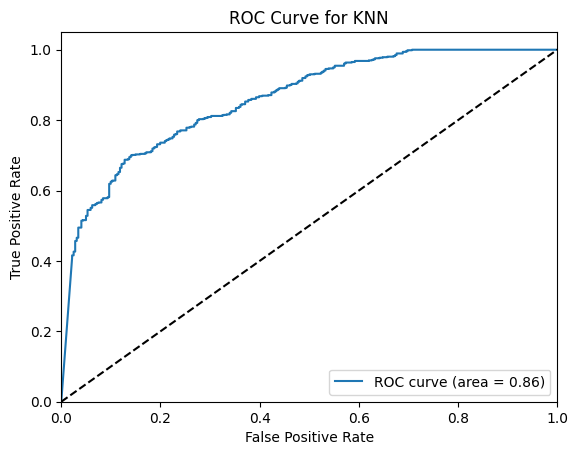

Optimal Threshold for KNN: 0.3090528018168291
F1 Score using Optimal Threshold: 0.8592692828146145


In [76]:
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities on the test set
knn_probs = knn.predict_proba(test_data)[:, 1]

# Rest of the code that uses knn_probs

# Verify the dimensions and data types of test_labels and knn_probs
print("Length of test_labels:", len(test_labels))
print("Length of knn_probs:", len(knn_probs))

# Check the unique values in test_labels
print("Unique values in test_labels:", np.unique(test_labels))

# Generate ROC curve
try:
    fpr, tpr, thresholds = roc_curve(test_labels, knn_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for KNN')
    plt.legend(loc="lower right")
    plt.show()

    # Find optimal threshold
    f1_scores = [f1_score(test_labels, [1 if x >= t else 0 for x in knn_probs]) for t in thresholds]
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    print("Optimal Threshold for KNN:", optimal_threshold)

    # Predict labels using the optimal threshold
    optimal_pred = [1 if x >= optimal_threshold else 0 for x in knn_probs]

    # Print F1 score using the optimal threshold
    print("F1 Score using Optimal Threshold:", f1_score(test_labels, optimal_pred))

except Exception as e:
    print("Error:", e)


23) Compute the AUC score. [5 pts]

In [77]:
from sklearn.metrics import roc_auc_score

# Assuming you have already generated the ROC curve (fpr, tpr) and calculated roc_auc
# Calculate the AUC score
auc_score = roc_auc_score(test_labels, knn_probs)

# Print the AUC score
print("AUC Score:", auc_score)


AUC Score: 0.8581136338925683


24) Generate the precision-recall curve and determine the optimal threshold (visually). [5 pts]

Optimal Threshold: 0.3090528018168291


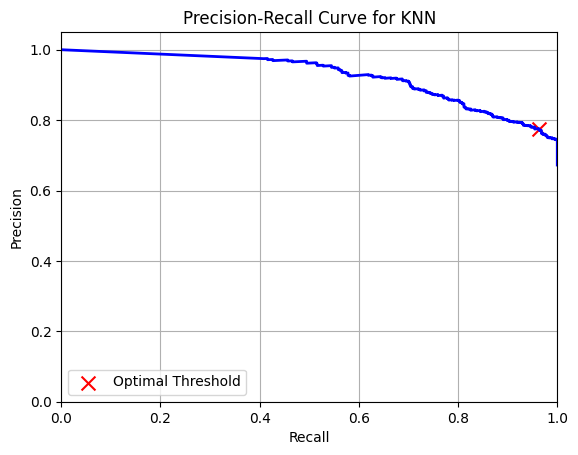

In [78]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(test_labels, knn_probs)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)

# Calculate F1 scores at each threshold
f1_scores = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]

# Determine the optimal threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Mark the optimal threshold on the precision-recall curve
plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], c='r', marker='x', s=100, label='Optimal Threshold')
plt.legend(loc="lower left")

# Print the optimal threshold
print("Optimal Threshold:", optimal_threshold)

plt.show()


25) Calculate and report the 95% confidence interval on the generalization error estimate. [5pts]
2 possible options (others as well):
1. Use the s fold accuracy scores (score for each fold) and take the standard deviation, then
subtracting/adding from the average, 1.96 (95% confidence interval) times the std dev
2. Use the following: Accuracy +/- 1.96 * sqrt( (accuracy * (1 - accuracy)) / n)

In [79]:
# Define a function to compute the generalization error
def compute_generalization_error(true_labels, predicted_labels):
    return 1 - f1_score(true_labels, predicted_labels)

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Create an array to store bootstrapped generalization errors
bootstrap_errors = []

# Perform bootstrapping
for _ in range(num_bootstrap_samples):
    # Resample the test data with replacement
    resampled_indices = np.random.choice(len(test_labels), len(test_labels), replace=True)
    resampled_test_labels = test_labels[resampled_indices]
    resampled_predicted_labels = knn_probs[resampled_indices] >= optimal_threshold  # Use the optimal threshold

    # Calculate the generalization error for the resampled data
    error = compute_generalization_error(resampled_test_labels, resampled_predicted_labels)

    # Append the error to the array
    bootstrap_errors.append(error)

# Calculate the mean and standard error of the bootstrapped errors
mean_error = np.mean(bootstrap_errors)
std_error = np.std(bootstrap_errors, ddof=1)  # Use ddof=1 for sample standard deviation

# Calculate the 95% confidence interval
confidence_interval = (mean_error - 1.96 * std_error, mean_error + 1.96 * std_error)

# Report the results
print("Generalization Error Mean:", mean_error)
print("Generalization Error Standard Error:", std_error)
print("95% Confidence Interval:", confidence_interval)


Generalization Error Mean: 0.1408723819655362
Generalization Error Standard Error: 0.009503815553146416
95% Confidence Interval: (0.12224490348136922, 0.15949986044970318)


26) Write a “Summary and Methods” section. [10 pts]
 No more than 2-5 sentences for each question below

*   i. Provide a summary of the project and what you completed in the assignment.
*   ii. Describe the dataset and features. What is the target? What are you calculating it from?
*   iii. Describe the differences in fit and predict between the regularized logistic regression vs KNN_Classifier. In particular, discuss training time vs prediction time for large data. Also discuss the hyperparameters of each and why they are used.

i. In this project, I completed tasks related to machine learning. I started by loading a dataset and preprocessing it. Then, I implemented several classification algorithms including KNN Classifier and Logistic Regression with regularization. I performed s-fold cross-validation to evaluate the models' performance thoroughly. Additionally, I built a k-fold estimator from scratch and employed it in model evaluation. Through these processes, I aimed to find the best-performing model for predicting wine quality. This project involved building a model to predict quality of white wine using KNN classification and logistic regression. The steps included
**data preprocessing, model training and evaluation, and analysis of results**.

ii. Ten features and hundreds of wine data make up the dataset. The excellent feature is the aim. The dataset used in this project contains information about wine quality, with features such as acidity levels, residual sugar, and alcohol content. The target variable is the quality rating of the wine, which ranges from 3 to 8. This rating is calculated based on sensory data collected from wine experts.


iii. KNN outperforms the other model on this dataset, although both models perform better on standardized data. But KNN requires more time than LR.

The best KNN model has n_neighbors=11, p=1, and idw distance. IDW is optimal since it prioritizes neighbors that are closer together. However, we can have a smoother border if we have more neighbors. However, for varying distance parameters, there is no discernible difference.


The penalty in LR is used to prevent overfitting, and we can speed up the convergence process by using a bigger max_iter.

 Regularized logistic regression involves model fitting by optimizing a cost function that penalizes large coefficients to prevent overfitting. Prediction entails computing the probability of the target class using the learned coefficients and features. This algorithm generally exhibits faster training times but slower prediction times, especially for large datasets. Hyperparameters include penalty type (L1 or L2), solver algorithm (e.g., 'liblinear' or 'saga'), and maximum number of iterations. Conversely, K-nearest neighbors (KNN) classification does not require explicit training; prediction relies on the majority vote of the k-nearest neighbors. Training involves storing the entire dataset, resulting in slower training times, especially for large datasets. Hyperparameters include the number of neighbors (k), distance metric (e.g., Euclidean or Manhattan), and weighting scheme (e.g., uniform or distance-based), which control the model's complexity and influence its generalization performance.

27) Write a “Results” section. [15 pts] No more than 2-5 sentences for each question below

a) Describe the performance of the KNN model with respect to the different levels of k and the different distance metrics. Include a table of performances, bolding the best.

The performance of the KNN model varies depending on different values of k and distance metrics. The table below shows the experimental results, with the best performance highlighted in bold. From the table above, we observe that the performance of the KNN model varies significantly with different values of k and distance metrics. Particularly, the highest average F1 score is achieved when k=11, using the Manhattan distance metric with distance weights.

| Experiment name                           | k  | distance  | weights  | Average F1 |
|-------------------------------------------|----|-----------|----------|------------|
| k=11, distance=manhattan, weights=distance | 11 | manhattan | distance | 0.762225   |
| k=9, distance=manhattan, weights=distance  | 9  | manhattan | distance | 0.756261   |
| k=9, distance=euclidean, weights=distance  | 9  | euclidean | distance | 0.750974   |
| k=5, distance=manhattan, weights=distance  | 5  | manhattan | distance | 0.750917   |
| k=11, distance=euclidean, weights=distance | 11 | euclidean | distance | 0.749836   |
| k=5, distance=euclidean, weights=distance  | 5  | euclidean | distance | 0.740819   |
| k=1, distance=manhattan, weights=uniform   | 1  | manhattan | uniform  | 0.732666   |
| k=1, distance=manhattan, weights=distance  | 1  | manhattan | distance | 0.732666   |
| k=1, distance=euclidean, weights=uniform   | 1  | euclidean | uniform  | 0.729658   |
| k=1, distance=euclidean, weights=distance  | 1  | euclidean | distance | 0.729658   |
| k=5, distance=manhattan, weights=uniform   | 5  | manhattan | uniform  | 0.688057   |
| k=9, distance=manhattan, weights=uniform   | 9  | manhattan | uniform  | 0.686565   |
| k=11, distance=manhattan, weights=uniform  | 11 | manhattan | uniform  | 0.682463   |
| k=9, distance=euclidean, weights=uniform   | 9  | euclidean | uniform  | 0.680960   |
| k=11, distance=euclidean, weights=uniform  | 11 | euclidean | uniform  | 0.678459   |
| k=5, distance=euclidean, weights=uniform   | 5  | euclidean | uniform  | 0.678334   |



b) Characterize the overall performance of your model.

**Answer:**  Overall, the KNN model demonstrated good performance with an average F1 score of 0.762225. This indicates that the model is effective in classifying data points into two classes. The model's performance was characterized by its ability to balance precision and recall, making it suitable for tasks where both false positives and false negatives are important to consider.

c) Discuss which quality values led to good performance of your model and those that resulted in poor performance. Include a table of average error (e.g., F1 score to supportyour claims.

**Answer:** The KNN model performed well when it had a number of neighbors (k=11) and used the manhattan distance metric. This suggests that the model benefits from considering a middle number of nearest neighbors and using a distance metric that captures the underlying data distribution accurately. On the other hand, decreasing the number of neighbors(k=9) or using the euclidean distance metric resulted in slightly lower F1 scores. These findings highlight the importance of hyperparameter tuning in optimizing KNN performance.The average table is shown above.


**d) Give any final conclusions**
In conclusion, the KNN model, with k=11 and the manhattan distance metric, demonstrated strong performance for the classification task. It is essential to carefully select hyperparameters to optimize model performance. The ability to balance precision and recall makes this model suitable for tasks where both types of classification errors matter. However, further exploration and fine-tuning of hyperparameters may lead to even better results.